In [2]:
# Import del dataset
import pandas as pd

# CAMBIAR DIRECCION DEL DATA SET AQUI #######################################
df = pd.read_csv('C:/Users/ggrel/Desktop/desafio/dataset_SCL.csv')

C:\Users\ggrel\AppData\Local\Temp\ipykernel_176220\4240343509.py:3: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/ggrel/Desktop/desafio/dataset_SCL.csv')


# Pregunta 1

### Estructura de la tabla

In [3]:
# Estructura del dataset
df.shape

(68206, 18)

In [4]:
# Transformar las fechas con datetime
import datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [5]:
# Analisis de los diferentes tipos de datos
var_string = list(df.select_dtypes(include=['object']).columns)
print(var_string, len(var_string))
var_date = list(df.select_dtypes(include=['datetime64']).columns)
print(var_date, len(var_date))
var_num = list(df.select_dtypes(include=['float64','int64']).columns)
print(var_num, len(var_num))

['Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Ori-O', 'Des-O', 'Emp-O', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES'] 13
['Fecha-I', 'Fecha-O'] 2
['DIA', 'MES', 'AÑO'] 3


In [6]:
# Contenido del dataset
print(df['AÑO'].value_counts())
print(df['SIGLAORI'].value_counts())

2017    68204
2018        2
Name: AÑO, dtype: int64
Santiago    68206
Name: SIGLAORI, dtype: int64


El dataset contiene los datos de los vuelos que salieron de Santiago en 2017. Los 2 vuelos que salieron en 2018 estaban previstos para el 31-12-1017 pero salieron con un leve retraso.

In [7]:
df.loc[df['AÑO'] == 2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


Hay 62 destinos posibles


Text(0.5, 1.0, 'las 20 ciudades de llegada más representadas')

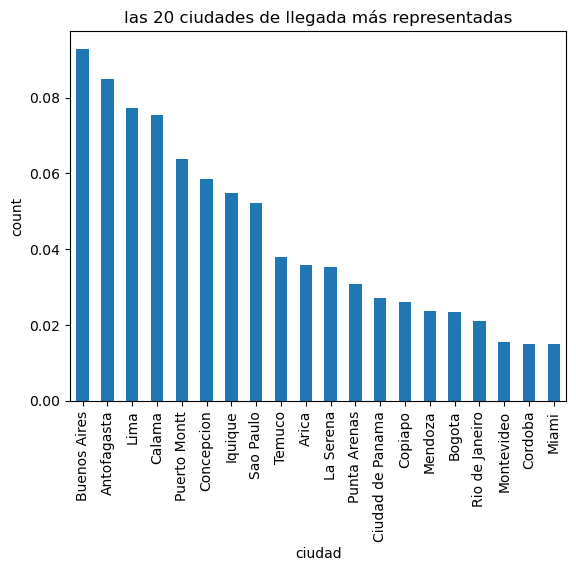

In [8]:
# Ciudad de llegada
import matplotlib.pyplot as plt
print("Hay", len(df['SIGLADES'].unique()), "destinos posibles")
df['SIGLADES'].value_counts(normalize = True)[:20].plot(kind='bar')
plt.xlabel("ciudad")
plt.ylabel("count")
plt.title("las 20 ciudades de llegada más representadas")

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64
Hay 23 compañias


Text(0.5, 1.0, 'Compañias operando')

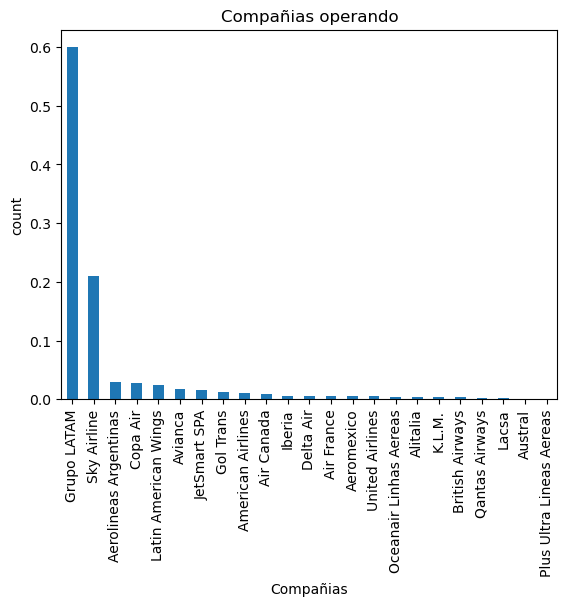

In [9]:
# Compañias operando
print(df['OPERA'].value_counts())
print("Hay", len(df['OPERA'].unique()), "compañias")
df['OPERA'].value_counts(normalize = True).plot(kind='bar')
plt.xlabel("Compañias")
plt.ylabel("count")
plt.title("Compañias operando")

La compañia LATAM representa casi el 60% de los vuelos. En función del objetivo del modelo se puede decidir incluir o no ciertas compañias. Obviamente si Latam busca evaluar el rendimiento de sus operaciones, no haría falta incluir las otras compañias. Por otro lado, si el objetivo fuera hacer un estudio del retraso global de las compañías e intentar evaluar los motivos de retrasos (la compañía misma, aeropuerto de llegada, tiempo...), habría que incluir todas las compañias. Como no tengo mayor informacíon sobre el objetivo del modelo, conservaré la totalidad del dataset por el momento. Puede también que los datos de las otras compañias sean más dificiles de obtener y esto puede introducir un sesgo en nuestros datos.

### Gestión de los valores NA  

Text(0.5, 1.0, 'total NA values')

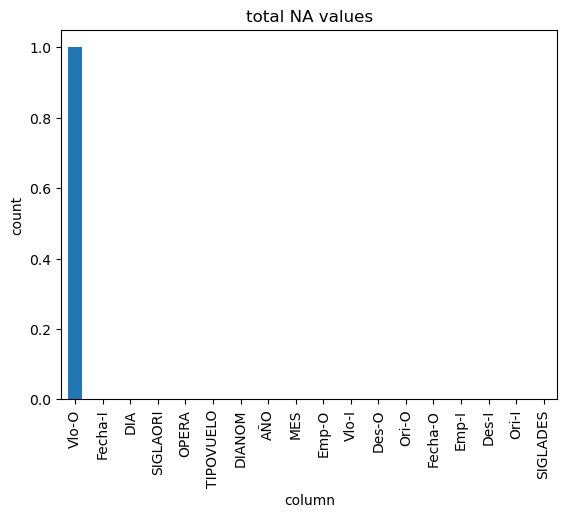

In [10]:
total_na = df.isnull().sum().sort_values(ascending=False)
total_na.plot(kind='bar')
plt.xlabel("column")
plt.ylabel("count")
plt.title("total NA values")

Vemos que el dataset solo contiene una linea con un valor NA. Podemos deducir su valor utilizando las otras lineas del dataset.

In [11]:
# Selección de la linea que contiene valores NA
boolean_na = df.isna().any(axis=1)
ligne_na = df[boolean_na]
sim_val = ligne_na.iloc[0,1:5]
vec = (df['Vlo-I'] == sim_val[0]) & (df['Ori-I'] == sim_val[1]) & (df['Des-I'] == sim_val[2]) & (df['Emp-I'] == sim_val[3])

# Reeplazamos el valor NA por el valor adecuado
df.loc[vec,'Vlo-O'].value_counts()
df.loc[boolean_na,'Vlo-O'] = 200

### Lineas duplicadas  

In [12]:
sum(df.duplicated())

0

### Verificación de la coherencia de los datos

In [13]:
# Verificación de que TIPOVUELO es binaria
print("número de valores de TIPOVUELO: ", len(df['TIPOVUELO'].value_counts()))

número de valores de TIPOVUELO:  2


In [14]:
# Verificación de que los que los valores de AÑO son coherentes
print("El valor del año es igual al año de la columna Fecha-O para ", sum(df['Fecha-O'].dt.year == df['AÑO']), " lineas")

El valor del año es igual al año de la columna Fecha-O para  68206  lineas


In [15]:
# Verificación de que los que los valores de MES son coherentes
print("El valor del mes es igual al mes de la columna Fecha-O para ", sum(df['Fecha-O'].dt.month == df['MES']), " lineas")
print("El valor del mes es valido para ", sum(df['Fecha-O'].dt.month.isin(set([i for i in range(1, 13)]))), " lineas")

El valor del mes es igual al mes de la columna Fecha-O para  68206  lineas
El valor del mes es valido para  68206  lineas


In [16]:
# Verificación de que los que los valores de DIA son coherentes
print("El valor del mes es igual al día de la columna Fecha-O para ", sum(df['Fecha-O'].dt.day == df['DIA']), " lineas")

valid_day = sum(pd.DataFrame({
    'col1': pd.DataFrame({'col1' :df['MES'].isin({1,3,5,7,8,10,12}),'col2': 1<=df['DIA'], 'col3': df['DIA']<=31}).all(axis='columns'),
    'col2': pd.DataFrame({'col1' :df['MES'].isin({4,6,9,11}),'col2': 1<=df['DIA'], 'col3': df['DIA']<=30}).all(axis='columns'),
    'col3': pd.DataFrame({'col1' :df['MES']==2,'col2': 1<=df['DIA'], 'col3': df['DIA']<=28}).all(axis='columns')
}).sum(axis=1))

print(f"El valor del mes es valido para {valid_day} lineas")

El valor del mes es igual al día de la columna Fecha-O para  68206  lineas
El valor del mes es valido para 68206 lineas


# Pregunta 2

In [17]:
# Creación de la variable high_season
high_season = pd.DataFrame({
    'col1': df['Fecha-I'].apply(lambda x: x<= datetime.date(2017,3,3)),
    'col2': df['Fecha-I'].apply(lambda x: x>= datetime.date(2017,7,15) and x<= datetime.date(2017,7,31)),
    'col3': df['Fecha-I'].apply(lambda x: x>= datetime.date(2017,9,11) and x<= datetime.date(2017,9,30)),
    'col4': df['Fecha-I'].apply(lambda x: x>= datetime.date(2017,12,15))
}).sum(axis=1)
df['high_season'] = high_season

df['high_season'].value_counts(normalize = True)

C:\Users\ggrel\AppData\Local\Temp\ipykernel_176220\3064780722.py:3: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  'col1': df['Fecha-I'].apply(lambda x: x<= datetime.date(2017,3,3)),
C:\Users\ggrel\AppData\Local\Temp\ipykernel_176220\3064780722.py:4: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  'col2': df['Fecha-I'].apply(lambda x: x>= datetime.date(2017,7,15) and x<= datetime.date(2017,7,31)),
C:\Users\ggrel\AppData\Local\Temp\ipykernel_176220\3064780722.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future

0    0.666276
1    0.333724
Name: high_season, dtype: float64

In [18]:
# Creación de la variable min_diff
df['min_diff'] = ((df['Fecha-O'] - df['Fecha-I']).dt.total_seconds()/60).astype(int)

In [19]:
# Creación de la variable delay_15
df['delay_15'] = (df['min_diff']>15).astype(int)

In [20]:
# Creación de la variable period_day
def period(time):
    period=str()
    if "05:00:00" <= time <= "11:59:00":
        period = 'morning'
    elif "12:00:00" <= time <= "18:59:00":
        period = 'afternoon'
    else:
        period = 'night'
    return period

df['period_day'] = df['Fecha-I'].dt.strftime("%H:%M:%S").apply(period)

In [21]:
# Export del nuevo dataset
df_export = df[['high_season','min_diff','delay_15','period_day','TIPOVUELO',]]

# CAMBIAR DIRECCION AQUI #######################################
df_export.to_csv('C:/Users/ggrel/Desktop/desafio/synthetic_features.csv', index=False)

# Pregunta 3

Dado que las variables no son númericas (sino binarias o categoricas), no podemos utilizar la función .corr() para calcular la correlación entre las variables. Vamos a calcular el coeficiente V de Cramer (o el coeficiente de correlación phi, ya que son iguales en este caso dado que la varaible delay_15 es binaria).

In [23]:
from scipy.stats import chi2_contingency
import numpy as np

var_cat = ['SIGLADES','OPERA','MES','DIANOM','TIPOVUELO','high_season']
for var in var_cat:
    table = pd.crosstab(df[var], df['delay_15'])
    n = table.sum().sum()
    chi2, _, _, _ = chi2_contingency(table)
    r, c = table.shape
    V = np.sqrt(chi2/(n * min(r-1, c-1)))
    print("Coeficiente de correlación V de Cramer entre", var, "y delay_15 =", V)

Coeficiente de correlación V de Cramer entre SIGLADES y delay_15 = 0.16668595571404196
Coeficiente de correlación V de Cramer entre OPERA y delay_15 = 0.16284307661863925
Coeficiente de correlación V de Cramer entre MES y delay_15 = 0.13179153243808636
Coeficiente de correlación V de Cramer entre DIANOM y delay_15 = 0.05682067625227398
Coeficiente de correlación V de Cramer entre TIPOVUELO y delay_15 = 0.09625670816903183
Coeficiente de correlación V de Cramer entre high_season y delay_15 = 0.0208139974767533


Las variables están muy poco correlacionadas con delay_15. Las variables que más se relacionan con delay_15 son la compañia y el destino. Para crear un modelo eficiente, va a ser necesario crear más variables.

# Preguntas 4 y 5

###  Creación de nuevas variables

Como hemos visto antes, es necesario aumentar el poder predictivo de nuestro dataset. Por eso vamos a crear nuevas variables:
- delay_comp: tasa de retraso de la compañia a la fecha del vuelo en 2017 (puede que el retraso sea culpa de la compañia). Lo ideal hubiese sido tener los datos de 2016 para poder evaluar mejor esta variable. También se podría considerar usar los 3 primeros meses del dataset para determinarla con mejor precisión y crear el modelo con la otra parte.
- delay_city: tasa de retraso de los vuelos llegando a la misma ciudad en 2017 (puede que el retraso se deba al aeropuerto de llegada)
- congestion: cuantos vuelos salen entre 30 min antes et 30 min después del vuelo
- country: pais de llegada 
- continent: continente de llegada (puede que para un vuelo intercontinental los pasajeros se demoren más tiempo en el aeropuerto con los controles de seguridad, generando retraso)

In [24]:
# Creación de la variable delay_comp
def delay_comp(i):
    df_temp = df.loc[(df['Fecha-I'] < df.iloc[i]['Fecha-I']) & (df['OPERA'] == df.iloc[i]['OPERA'])]
    if df_temp.shape[0] != 0:
        return df_temp.loc[df['delay_15'] == 1].shape[0] / df_temp.shape[0]
    else:
        return 0

df['delay_comp'] = df.apply(lambda x: delay_comp(x.name), axis=1)

In [26]:
# Creación de la variable delay_city
def delay_city(i):
    df_temp = df.loc[(df['Fecha-I'] < df.iloc[i]['Fecha-I']) & (df['SIGLADES'] == df.iloc[i]['SIGLADES'])]
    if df_temp.shape[0] != 0:
        return df_temp.loc[df['delay_15'] == 1].shape[0] / df_temp.shape[0]
    else:
        return 0
    
df['delay_city'] = df.apply(lambda x: delay_city(x.name), axis=1)

In [27]:
# Creación de la variable congestion
from datetime import timedelta

def congestion(i):
    return df.loc[(df['Fecha-I'] <= df.iloc[i]['Fecha-I'] + timedelta(minutes=30)) & (df['Fecha-I'] >= df.iloc[i]['Fecha-I'] - timedelta(minutes=30))].shape[0]

df['congestion'] = df.apply(lambda x: congestion(x.name), axis=1)

In [28]:
# Creación de la variable country
country = [None] * df.shape[0]
for i in range(df.shape[0]):
    if df.loc[i,'TIPOVUELO'] == 'N':
        country[i] = 'Chile'
    elif df.loc[i,'SIGLADES'] in {'Buenos Aires','Cordoba','Mendoza','Rosario','San Juan, Arg.','Tucuman','Neuquen','Ushuia','Bariloche','Cataratas Iguacu'}:
        country[i] = 'Argentina'
    elif df.loc[i,'SIGLADES'] in {'Rio de Janeiro', 'Sao Paulo','Florianapolis','Curitiba, Bra.'}:
        country[i] = 'Brazil'
    elif df.loc[i,'SIGLADES'] in {'Ciudad de Mexico','Cancun'}:
        country[i] = 'Mexico'
    elif df.loc[i,'SIGLADES'] in {'Lima','Pisco, Peru'}:
        country[i] = 'Perú'
    elif df.loc[i,'SIGLADES'] in {'Ciudad de Panama'}:
        country[i] = 'Panama'
    elif df.loc[i,'SIGLADES'] in {'Bogota'}:
        country[i] = 'Colombia'
    elif df.loc[i,'SIGLADES'] in {'Montevideo','Punta del Este'}:
        country[i] = 'Uruguay'
    elif df.loc[i,'SIGLADES'] in {'Miami','Nueva York','Auckland N.Z.','Atlanta','Dallas','Houston','Los Angeles','Orlando','Washington'}:
        country[i] = 'Estados Unidos'
    elif df.loc[i,'SIGLADES'] in {'Paris'}:
        country[i] = 'Francia'
    elif df.loc[i,'SIGLADES'] in {'Madrid'}:
        country[i] = 'España'
    elif df.loc[i,'SIGLADES'] in {'Londres'}:
        country[i] = 'Inglaterra'
    elif df.loc[i,'SIGLADES'] in {'Quito','Guayaquil'}:
        country[i] = 'Ecuador'
    elif df.loc[i,'SIGLADES'] in {'Roma'}:
        country[i] = 'Italia'
    elif df.loc[i,'SIGLADES'] in {'Asuncion'}:
        country[i] = 'Paraguay'
    elif df.loc[i,'SIGLADES'] in {'La Paz','Santa Cruz','Cochabamba'}:
        country[i] = 'Bolivia'
    elif df.loc[i,'SIGLADES'] in {'Toronto','Sidney','Melbourne'}:
        country[i] = 'Australia'
    elif df.loc[i,'SIGLADES'] in {'Punta Cana'}:
        country[i] = 'República Dominicana'
    else:
        country[i] = 'Malvinas'
        
df['country'] = country

In [29]:
# Creación de la variable country
continent = [None] * df.shape[0]
for i in range(df.shape[0]):
    if df.loc[i,'country'] in {'Chile','Argentina','Brazil','Mexico','Perú','Panama','Colombia','Uruguay','Ecuador','Paraguay','Bolivia','República Dominicana','Malvinas'}:
        continent[i] = 'America del Sur'
    elif df.loc[i,'country'] in {'Italia','Inglaterra','España','Francia'}:
        continent[i] = 'Europa'
    elif df.loc[i,'country'] in {'Estados Unidos'}:
        continent[i] = 'America del Norte'
    elif df.loc[i,'country'] in {'Australia'}:
        continent[i] = 'Oceania'
        
df['continent'] = continent

Determinemos la correlacion de las nuevas variables númericas con min_diff:

<AxesSubplot:>

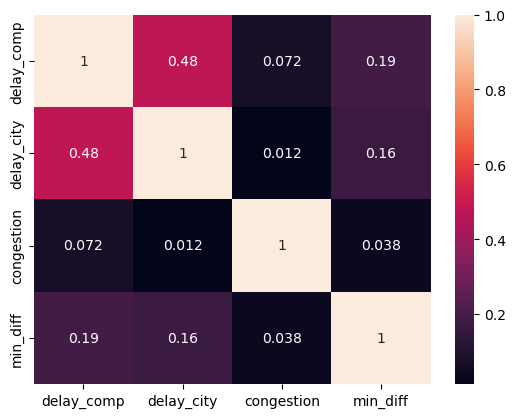

In [30]:
import seaborn as sns
sns.heatmap(df[['delay_comp','delay_city','congestion','min_diff']].corr(),annot=True)

La variable más correlada con min_diff es delay_comp. No obstante, la correlación sigue muy baja y proviene probablemente de la calidad de los datos que nos dieron. Habría que incluir otros datos más relevantes tales que datos meteologicos por ejemplo (pero parece bastante complicado acceder a una base completa de este tipo).

Ahora veamos la correlación entre las nuevas variables categoricas y delay_15:

In [31]:
var_cat = ['country','continent']
for var in var_cat:
    table = pd.crosstab(df[var], df['delay_15'])
    n = table.sum().sum()
    chi2, _, _, _ = chi2_contingency(table)
    r, c = table.shape
    V = np.sqrt(chi2/(n * min(r-1, c-1)))
    print("Coeficiente de correlación V de Cramer entre", var, "y delay_15 =", V)

Coeficiente de correlación V de Cramer entre country y delay_15 = 0.14948521813909071
Coeficiente de correlación V de Cramer entre continent y delay_15 = 0.03161697296267305


Vemos que la variable country tiene poca influencia sobre el comportamiento de delay_15 (pero aporta un poco más que las variables iniciales). Por otro lado, el continente no influye casi nada.

### Modelos de clasificación 

In [32]:
# Definamos una función que nos permitirá determinar el AUC y dibujar la curva ROC para test y entrenamiento

from sklearn.metrics import roc_curve, auc

def plot_roc(y_train, y_predict_proba_train, y_test, y_predict_proba_test):

    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_predict_proba_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_predict_proba_test)

    auc_train = roc_auc_score(y_train, y_predict_proba_train)
    auc_test = roc_auc_score(y_test, y_predict_proba_test)

    plt.plot(fpr_train, tpr_train, label='Train AUC = {:.2f}'.format(auc_train))
    plt.plot(fpr_test, tpr_test, label='Test AUC = {:.2f}'.format(auc_test))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [33]:
# Definamos una función que nos permitirá determinar la matriz de confusión y los indicadores asociados y entrenamiento

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

def mc_metrics(y_train, y_predict_train, y_test, y_predict_test):
    
    train_report = classification_report(y_train, y_predict_train, output_dict=True)
    test_report = classification_report(y_test, y_predict_test, output_dict=True)
    
    precision_train, recall_train, f1_score_train, _ = precision_recall_fscore_support(y_train, y_predict_train, pos_label=1)
    precision_test, recall_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_predict_test, pos_label=1)
    
    results = pd.DataFrame({
        'Train Precision': precision_train[1],
        'Train Recall': recall_train[1],
        'Train F1 Score': f1_score_train[1],
        'Train Accuracy': train_report['accuracy'],
        'Test Precision': precision_test[1],
        'Test Recall': recall_test[1],
        'Test F1 Score': f1_score_test[1],
        'Test Accuracy': test_report['accuracy'],
    }, index=['Performance'])

    # Afficher les scores sous forme de carte de chaleur
    sns.heatmap(results, annot=True, cmap="YlGnBu")
    plt.show()
    
    # Matriz de confusión
    cm_train = confusion_matrix(y_train, y_predict_train, labels=[0, 1])
    cm_test = confusion_matrix(y_test, y_predict_test, labels=[0, 1])
    
    # Plot de las 2 matrices
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.heatmap(cm_train, annot=True, cmap="Blues", fmt='g', ax=axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Train Confusion Matrix')
    
    sns.heatmap(cm_test, annot=True, cmap="Blues", fmt='g', ax=axes[1])
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('True labels')
    axes[1].set_title('Test Confusion Matrix')

    plt.show()


#### Random forest 

Dado que buena parte de nuestras variables predictivas son categoricas, los arboles aleatorios parecen ser una buena opción como primer modelo. En efecto, no hace falta el scaling de los datos y como el poder predictivo de nuestras variables no es muy bueno, el bagging permitirá reducir la varianza.

In [34]:
# Sacamos las variables inutiles
df_model = df.drop(['Fecha-I','Fecha-O','Ori-I','Ori-O','Vlo-I','Vlo-O','Des-O','SIGLAORI','Des-I','Emp-I','Emp-O','AÑO','min_diff'], axis=1)

In [35]:
# Encoding de las variables categoricas
from sklearn.preprocessing import OneHotEncoder

var_string = list(df_model.select_dtypes(include=['object']).columns)

encoder = OneHotEncoder()
encoded_cols = encoder.fit_transform(df_model[var_string])
df_model = pd.concat([df_model.drop(var_string, axis=1), pd.DataFrame(encoded_cols.toarray())], axis=1)

# Nuevas variables
df_model.columns = df_model.columns.astype(str)
var = df_model.drop('delay_15', axis=1).columns.tolist()

Creamos los datasets de test y entrenamiento con la función StratifiedShuffleSplit para conservar la misma proporción de 0 y 1 de la variable en los 2 datasets.

In [36]:
# Creación datasets test y entrenamiento
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
train_idx, test_idx = next(sss.split(df_model[var],df_model['delay_15']))
X_train = df_model.loc[train_idx,var]
y_train = df_model.loc[train_idx,'delay_15']
X_test = df_model.loc[test_idx,var]
y_test = df_model.loc[test_idx,'delay_15']

In [37]:
# Creación del modelo
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier(n_estimators = 100, max_depth = 10)
RC = RC.fit(X_train, y_train)

Si aumentamos demasiado max_depth, el modelo tiene mucho overfitting. Con una profundidad máxima de 10, las curvas ROC nos muestran que hay poco overfitting:

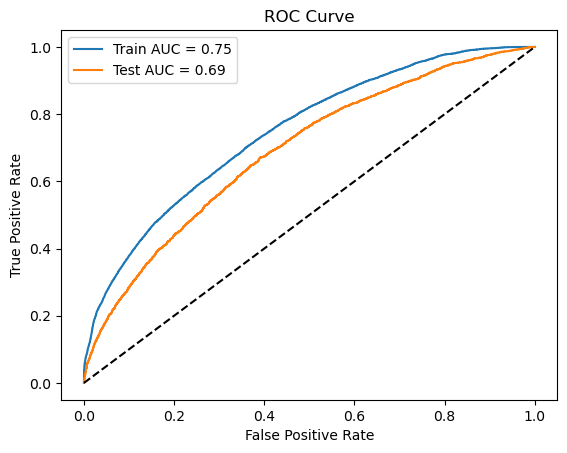

In [38]:
# Curva ROC y AUC
plot_roc(y_train, RC.predict_proba(X_train)[:, 1], y_test, RC.predict_proba(X_test)[:, 1])

No obstante, este modelo no es aceptable. En efecto, el recall es excesivamente bajo (el error de tipo II es muy grande). Por lo tanto, muy pocos vuelos están predichos con retraso.

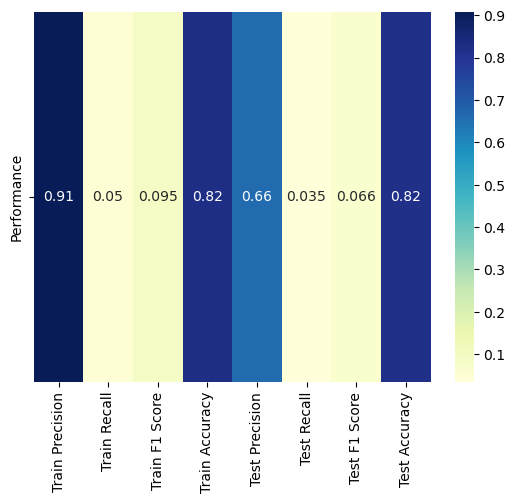

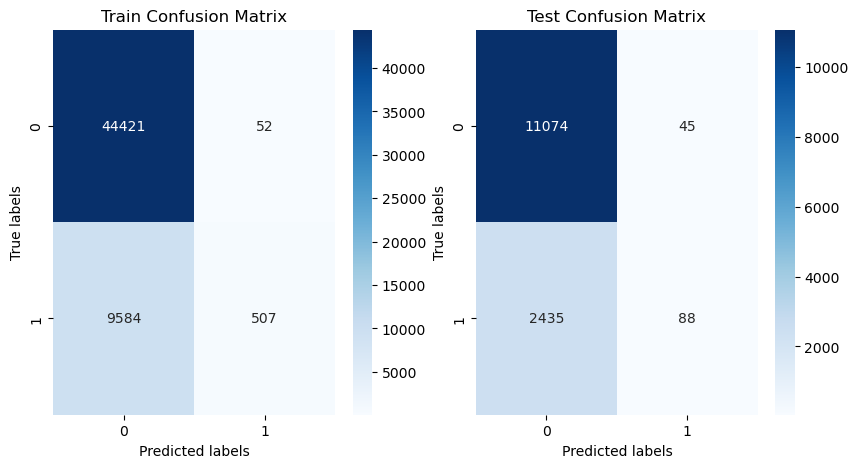

In [39]:
# Matrices de confusión e indicadores asociados
mc_metrics(y_train, RC.predict(X_train), y_test, RC.predict(X_test))

### K nearest neighbors 

Para este tipo de modelo, es importante quedarse con variables númericas, binarias y ordinales. Dado que este modelo se basa en el en cálculo de distancia, el scaling de las variables es importante.

In [142]:
# Sacamos las variables inutiles
df_model = df.drop(['DIA','MES','Fecha-I','Fecha-O','Ori-I','Ori-O','Vlo-I','Vlo-O','Des-O','SIGLAORI','Des-I','Emp-I','Emp-O','AÑO','min_diff'], axis=1)

In [143]:
# Scaling y encoding de las variables
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler

bin_var = ['TIPOVUELO']
num_var = ['delay_comp','delay_city','congestion']
cat_var = list(set(df_model.drop('delay_15', axis=1).columns)-set(bin_var)-set(num_var))

# Encoding
lb = LabelBinarizer()
for column in bin_var:
    df_model[column] = lb.fit_transform(df_model[column])
df_model = pd.get_dummies(df_model, columns = cat_var, drop_first = True)

# Scaling
mm = MinMaxScaler()
for column in [num_var]:
    df_model[column] = mm.fit_transform(df_model[column])
    
# Nuevas variables
df_model.columns = df_model.columns.astype(str)
var = df_model.drop('delay_15', axis=1).columns.tolist()

In [144]:
# Creación datasets test y entrenamiento
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
train_idx, test_idx = next(sss.split(df_model[var],df_model['delay_15']))
X_train = df_model.loc[train_idx,var]
y_train = df_model.loc[train_idx,'delay_15']
X_test = df_model.loc[test_idx,var]
y_test = df_model.loc[test_idx,'delay_15']

In [145]:
# Creación del modelo
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 11)
KNN = KNN.fit(X_train, y_train)

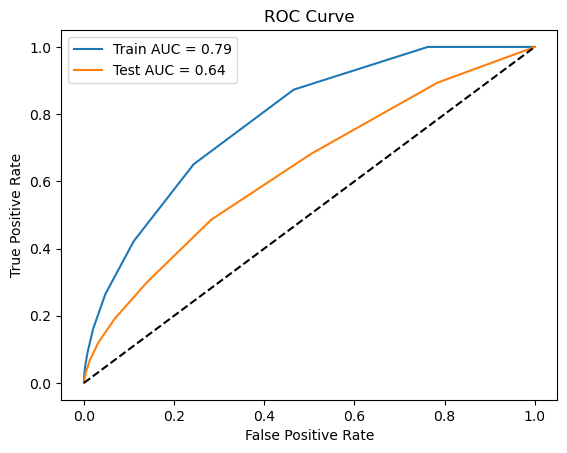

In [146]:
# Curva ROC y AUC
plot_roc(y_train, KNN.predict_proba(X_train)[:, 1], y_test, KNN.predict_proba(X_test)[:, 1])

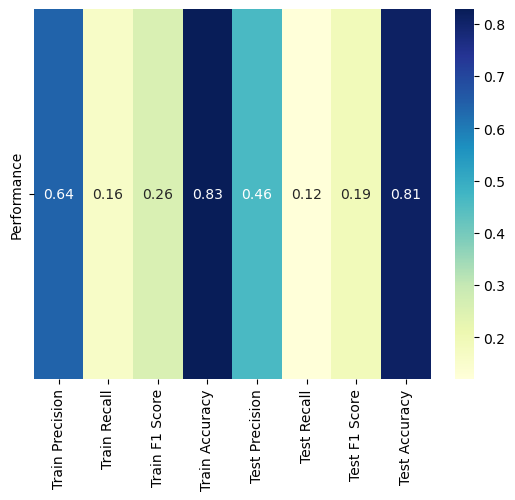

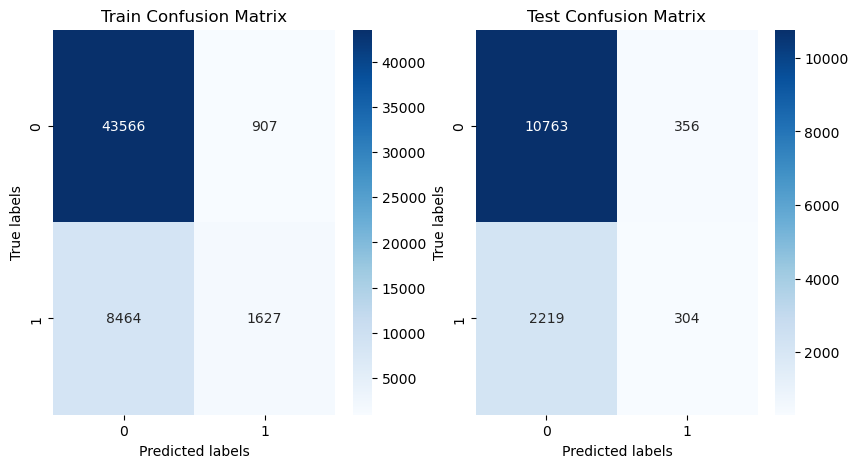

In [147]:
# Matrices de confusión e indicadores asociados
mc_metrics(y_train, KNN.predict(X_train), y_test, KNN.predict(X_test))

Con 7 vecinos, el modelo parece ser más interesante que el modelo anterior dado que el recall es mucho más grande (incluso si el AUC es más bajo): más del 15% para el training y el test. Muestra en particular que no hay overfitting y que captamos muchos más vuelos con retraso. Veamos cual número de vecinos mejora el recall. Dado que la variable delay_15 es binaria, consideraremos solo valores impares de vecinos (para evitar los empates).

In [148]:
from sklearn.metrics import precision_recall_fscore_support

recall_train = list()
recall_test = list()

for k in range(1, 50, 2):
    
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN = KNN.fit(X_train, y_train)
    
    y_predict_train = KNN.predict(X_train)
    y_predict_test = KNN.predict(X_test)
    
    precision_train, rec_train, f1_score_train, _ = precision_recall_fscore_support(y_train, y_predict_train, pos_label=1)
    precision_test, rec_test, f1_score_test, _ = precision_recall_fscore_support(y_test, y_predict_test, pos_label=1)
    
    recall_train.append((k,rec_train[1]))
    recall_test.append((k,rec_test[1]))

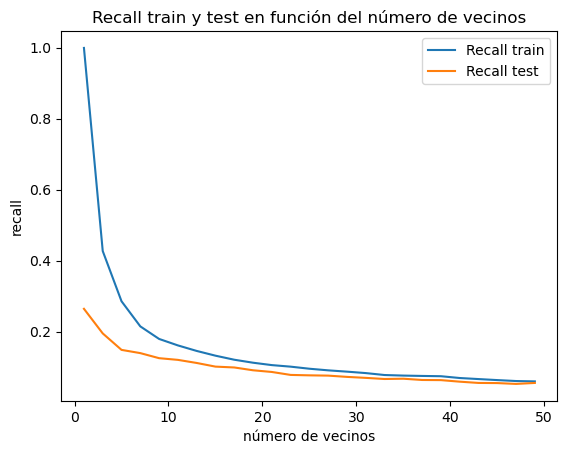

In [149]:
import matplotlib.pyplot as plt

x1, y1 = zip(*recall_train)
x2, y2 = zip(*recall_test)

fig, ax = plt.subplots()
ax.plot(x1, y1, label='Recall train')
ax.plot(x2, y2, label='Recall test')
ax.legend()
ax.set_xlabel('número de vecinos')
ax.set_ylabel('recall')
ax.set_title('Recall train y test en función del número de vecinos')

plt.show()

Notamos que el recall se estabiliza a unos 5% cuando k crece. Eligiendo k entre 5 y 11, el recall del test tiene un valor superior a 10% y el overfit es aceptable en esta zona. Concluimos que este modelo es mucho mejor que los arbóles aleatorios que tenían un recall casi nulo. Por lo tanto somos capaces detectar más vuelos con retraso.

### SVM 

El último modelo que vamos a entrenar aquí es el SVM. Ya vimos en los 2 modelos anteriores que nos faltan variables predictivas, intentaremos resolver parte de este problema creando variables polinomiales a partir de las variables númericas (podríamos haberlo hecho antes también).

In [115]:
# Sacamos las variables inutiles
df_model = df.drop(['DIA','MES','Fecha-I','Fecha-O','Ori-I','Ori-O','Vlo-I','Vlo-O','Des-O','SIGLAORI','Des-I','Emp-I','Emp-O','AÑO','min_diff'], axis=1)

In [116]:
# Scaling y encoding de las variables
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler, PolynomialFeatures

bin_var = ['TIPOVUELO']
num_var = ['delay_comp','delay_city','congestion']
cat_var = list(set(df_model.drop('delay_15', axis=1).columns)-set(bin_var)-set(num_var))

# Encoding
lb = LabelBinarizer()
for column in bin_var:
    df_model[column] = lb.fit_transform(df_model[column])
df_model = pd.get_dummies(df_model, columns = cat_var, drop_first = True)

In [117]:
# Scaling
mm = MinMaxScaler()
for column in [num_var]:
    df_model[column] = mm.fit_transform(df_model[column])
    
# Transformación polinomial
polyFeat = PolynomialFeatures(degree = 3)
polyFeat = polyFeat.fit(df_model[num_var])
df_model_poly = pd.DataFrame(polyFeat.transform(df_model[num_var]))

# Dataset para el modelo
df_model = pd.concat([df_model.drop(num_var, axis=1), df_model_poly], axis=1, join='outer')

In [118]:
# Nuevas variables
df_model.columns = df_model.columns.astype(str)
var = df_model.drop('delay_15', axis=1).columns.tolist()

In [120]:
# Creación datasets test y entrenamiento
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
train_idx, test_idx = next(sss.split(df_model[var],df_model['delay_15']))
X_train = df_model.loc[train_idx,var]
y_train = df_model.loc[train_idx,'delay_15']
X_test = df_model.loc[test_idx,var]
y_test = df_model.loc[test_idx,'delay_15']

In [122]:
# Creación del modelo
from sklearn.svm import SVC

rbfSVC = SVC(kernel = 'rbf', gamma = 1.0, C = 10.0)
rbfSVC = rbfSVC.fit(X_train, y_train)

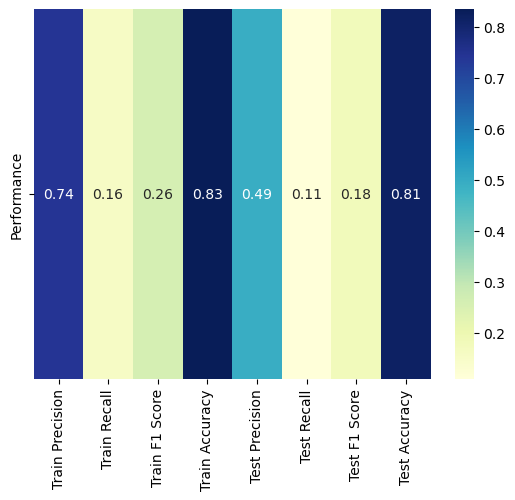

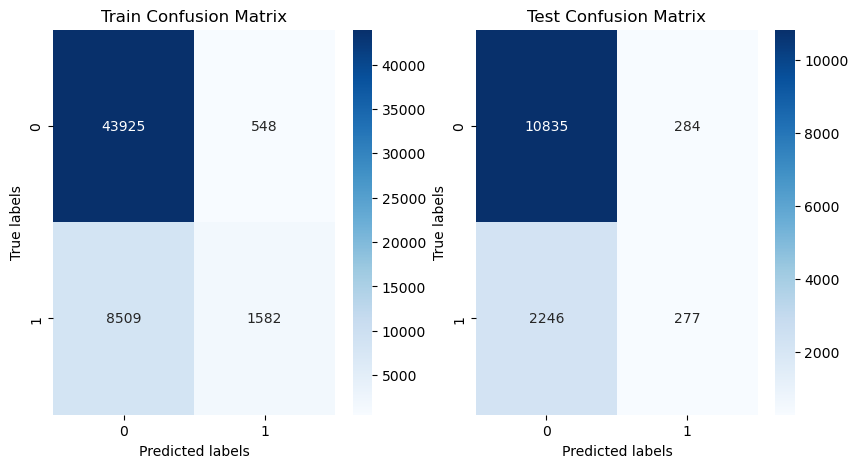

In [123]:
# Matrices de confusión e indicadores asociados
mc_metrics(y_train, rbfSVC.predict(X_train), y_test, rbfSVC.predict(X_test))

Los resultados son similares a los resultados de los modelos anteriores. El hecho de añadir variables polinomiales no ha mejorado los resultados (hasta puede empeorarlos), ya que ha añadido cierta redundancia en los datos.

### Un comentario sobre la regresión 

Una idea para resolver el problema podría haber sido entrenar una regresión para predecir la variable min_diff. Desafortunadamente el poder predictivo no es suficiente para obtener resultados satisfactorios en el caso binario. Por lo tanto, hay muy poca esperanza (por no decir ninguna) de obtener resultados interesantes en el caso de la regresión.

No obstante, algunos comentarios se pueden hacer sobre la distribución de 'min_diff' y muestran que habría posibilidades de construir un modelo interesante si los datos fueran de mejor calidad. 

(array([ 3982., 29629., 18618.,  6891.,  3414.,  1729.,  1031.,   600.,
          517.,   364.,   287.,   228.,   184.,   167.,   133.,   121.,
          102.,    66.,    68.,    75.]),
 array([-14.  ,  -5.25,   3.5 ,  12.25,  21.  ,  29.75,  38.5 ,  47.25,
         56.  ,  64.75,  73.5 ,  82.25,  91.  ,  99.75, 108.5 , 117.25,
        126.  , 134.75, 143.5 , 152.25, 161.  ]),
 <BarContainer object of 20 artists>)

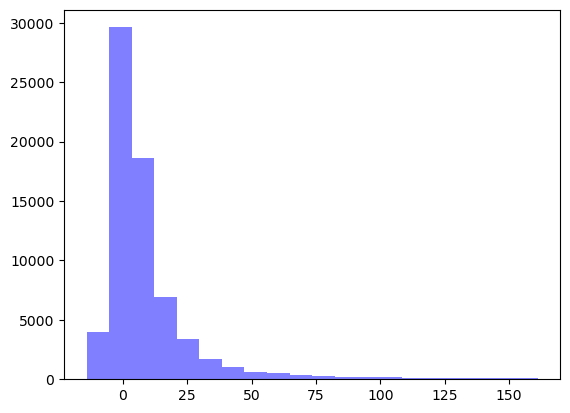

In [51]:
# Histrograma de la distribución

import matplotlib.pyplot as plt
plt.hist(df['min_diff'], bins=20, alpha=0.5, color='blue')

Vemos que la distribución parece ser una ley exponencial (como suele serlo para un retraso...). Los valores negativos (correspondiendo a vuelos que salieron unos minutos antes de la hora prevista) molestan un poco para que la distribución coincida con una ley exponencial. Si el retraso es negativo, le daremos el valor 0.

In [65]:
min_diff_pos = df.copy()['min_diff']
min_diff_pos[min_diff_pos<0] = 0

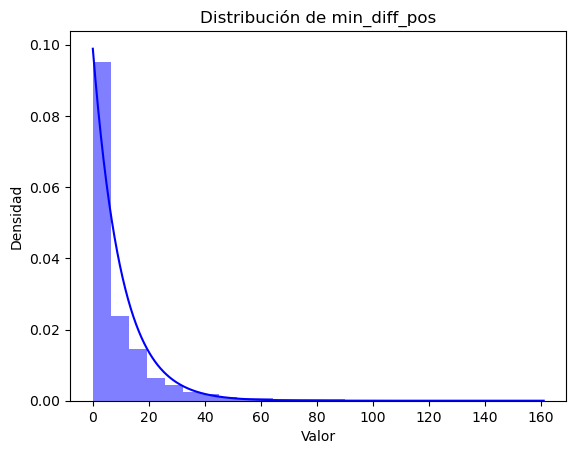

In [69]:
from scipy.stats import expon
x = np.linspace(0, np.max(min_diff_pos), 1000)
plt.plot(x, expon.pdf(x, scale=np.mean(min_diff_pos)), color='blue')
plt.hist(min_diff_pos, bins=25, density=True, alpha=0.5, color='blue')
plt.title('Distribución de min_diff_pos')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

El gráfico anterior muestra que la distribución de min_diff_pos parece seguir una ley exponential de parametro su media. Veamos si se puede confirmar con el test:

In [70]:
from scipy.stats import expon, kstest
kstest(min_diff_pos, expon.cdf)

KstestResult(statistic=0.5068208546887587, pvalue=0.0)

Desafortunadamente la p-value es extremadamente baja y concluimos que la distribución no sigue una ley exponencial. Cabe recordar que nuestros datos contienen mucho sesgo ya que LATAM está sobrerepresentada en los datos por ejemplo. Necesitariamos más datos para comprobar si realmente la distribución es exponencial o no. Si lo fuera (mediante una transformación si hiciera falta), esto nos daría buena esperanza de construir un buen modelo de regresión teniendo más variables predictivas. 

# Conclusión 

Entrenamos varios modelos predictivos binarios. Vimos que los resultados obtenidos no son muy buenos de forma general. Pocos vuelos se predicen con retraso (como lo muestra el recall). Tal que lo comentamos, estos resultados muestran que no se podría esperar algo mejor con una regresión (sino lo contrario). 

Podríamos haber probado otros tipos de modelos tales que redes neuronales. pero dado la calidad de los datos me temo que los resultados no hubiesen sido mejor. Tambien podríamos haber buscado los mejores hiperparametros de cada modelo usando una cross-validation usando la función GridSearchCV, pero no creo que hubiese mejorado mucho los resultados tampoco.

Los datos siguientes podrían mejorar significativamente los resultados obtenidos aquí:
- datos méteologicos
- una variable indicando que tan lleno está el avión
- modelo del avión y caracteristicas (que tan viejo es, fechas de mantención...)
- saber si el avión utilizado para el vuelo es el avión de un vuelo que acaba de llegar (me imagino que esta variable es muy importante dado que puede acarrear un efecto domino)
- ...

La última idea que mencionaré aquí es que habría que adaptar el dataset en función del objetivo. Por ejemplo, podríamos entrenar separar la base de datos en 2 bases de datos: el primero conteniendo los vuelos nacionales y el segundo los vuelos internacionales. Podría ser interesante también construir modelos para los vuelos de LATAM únicamente.